<a href="https://colab.research.google.com/github/sakshi754/IBM_course2/blob/main/Historical_Stock_and_Revenue_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Historical Stock and Revenue Analysis for Tesla and GameStop

In [1]:

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


## Function to extract stock data using yfinance

In [2]:

def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    stock_data = stock.history(period="5y")
    stock_data.reset_index(inplace=True)
    return stock_data


## Function to extract revenue data using web scraping

In [12]:
def get_revenue_data(url, table_index):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"
    }
    html_data = requests.get(url, headers=headers).text
    soup = BeautifulSoup(html_data, "html.parser")
    tables = soup.find_all("table")

    if len(tables) <= table_index:
        print(f"Error: Table index {table_index} is out of range. There are {len(tables)} tables on the page.")
        return None

    revenue_table = pd.read_html(str(tables[table_index]))[0]
    revenue_table.columns = ["Date", "Revenue"]
    revenue_table["Date"] = pd.to_datetime(revenue_table["Date"], errors='coerce')
    revenue_table = revenue_table.dropna().reset_index(drop=True)
    revenue_table["Revenue"] = revenue_table["Revenue"].str.replace(',', '').str.replace('$', '').astype(float)
    return revenue_table



## Question 1 - Extracting Tesla Stock Data Using yfinance (2 Points)

In [4]:

tesla_stock = get_stock_data("TSLA")
tesla_stock.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-03-26 00:00:00-04:00,36.492668,37.333332,34.150002,35.210667,260710500,0.0,0.0
1,2020-03-27 00:00:00-04:00,33.666668,35.053333,32.935333,34.290668,215661000,0.0,0.0
2,2020-03-30 00:00:00-04:00,34.017334,34.443333,32.748669,33.475334,179971500,0.0,0.0
3,2020-03-31 00:00:00-04:00,33.416668,36.197334,33.133331,34.933334,266572500,0.0,0.0
4,2020-04-01 00:00:00-04:00,33.599998,34.263332,31.673332,32.104000,200298000,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping (1 Point)

In [13]:

tesla_revenue = get_revenue_data("https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue", 1)
tesla_revenue.head()


<ipython-input-12-bbc13caa1ddc>:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  revenue_table = pd.read_html(str(tables[table_index]))[0]


,Date,Revenue
0,2024-12-31,25707.0
1,2024-09-30,25182.0
2,2024-06-30,25500.0
3,2024-03-31,21301.0
4,2023-12-31,25167.0


## Question 3 - Extracting GameStop Stock Data Using yfinance (2 Points)

In [6]:

gamestop_stock = get_stock_data("GME")
gamestop_stock.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-03-26 00:00:00-04:00,1.0600,1.1775,1.0600,1.1025,24742800,0.0,0.0
1,2020-03-27 00:00:00-04:00,1.2350,1.2725,1.0375,1.0550,28099200,0.0,0.0
2,2020-03-30 00:00:00-04:00,1.0550,1.0675,0.9125,0.9125,13402400,0.0,0.0
3,2020-03-31 00:00:00-04:00,0.9075,0.9500,0.8750,0.8750,9203600,0.0,0.0
4,2020-04-01 00:00:00-04:00,0.8625,0.8725,0.7800,0.8125,18274800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping (1 Point)

In [14]:

gamestop_revenue = get_revenue_data("https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue", 1)
gamestop_revenue.head()


<ipython-input-12-bbc13caa1ddc>:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  revenue_table = pd.read_html(str(tables[table_index]))[0]


,Date,Revenue
0,2024-10-31,860.0
1,2024-07-31,798.0
2,2024-04-30,882.0
3,2024-01-31,1794.0
4,2023-10-31,1078.0


from matplotlib import pyplot as plt
_df_0['Revenue'].plot(kind='hist', bins=20, title='Revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Revenue']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Revenue')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Revenue']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Revenue')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Revenue'].plot(kind='line', figsize=(8, 4), title='Revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

## Question 5 - Tesla Stock and Revenue Dashboard (2 Points)

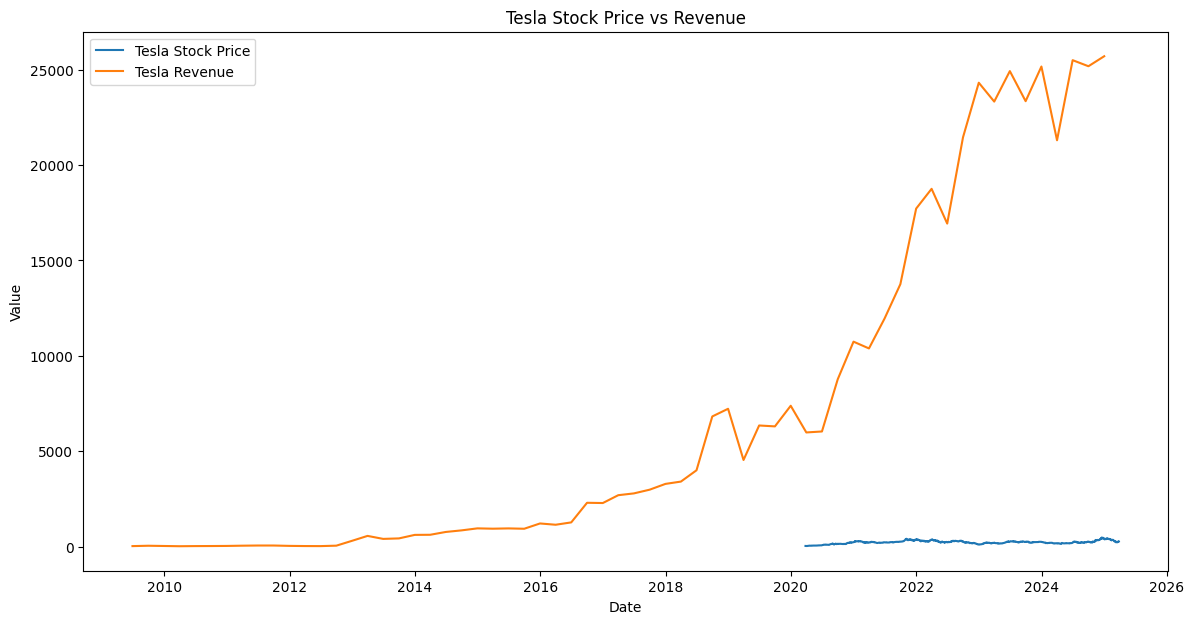

In [15]:

plt.figure(figsize=(14, 7))
plt.plot(tesla_stock['Date'], tesla_stock['Close'], label='Tesla Stock Price')
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], label='Tesla Revenue')
plt.title('Tesla Stock Price vs Revenue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


## Question 6 - GameStop Stock and Revenue Dashboard (2 Points)

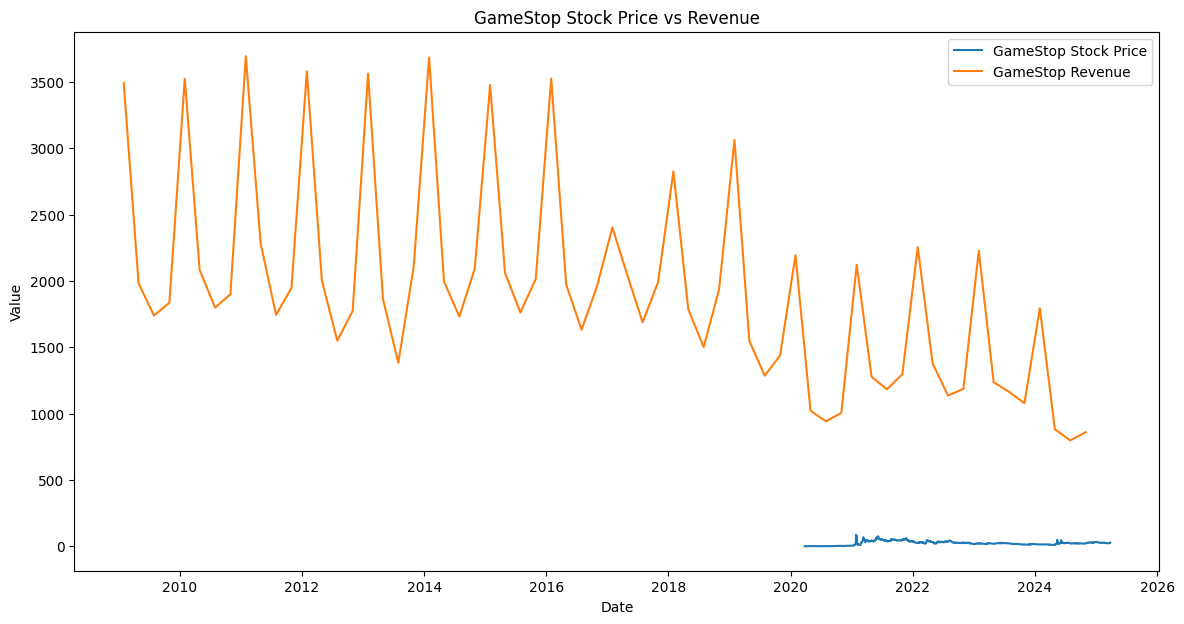

In [16]:

plt.figure(figsize=(14, 7))
plt.plot(gamestop_stock['Date'], gamestop_stock['Close'], label='GameStop Stock Price')
plt.plot(gamestop_revenue['Date'], gamestop_revenue['Revenue'], label='GameStop Revenue')
plt.title('GameStop Stock Price vs Revenue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
